# ifm_contrib: Plot - Pandas Extension

GeoPANDAS is a Python library with powerfull features for 2D Geometry operations.
The `doc.c.plot.gdf` object provides features to export plots similar to those in FEFLOW's View Components Panel to GeoPandas GeoDataFrames.

*contact: [Alex Renz](https://github.com/red5alex), are@dhigroup.com* 

In [1]:
import sys
sys.path.append("C:/Program Files/DHI/2019/FEFLOW 7.2/python")
import ifm_contrib as ifm 
ifm.forceLicense("Viewer")
doc = ifm.loadDocument("./example_data/example_2D.dac")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

`doc.c.plot.gdf.fringes()` and `doc.c.plot.gdf.isolines()` returns a GeoDataFrame with contents similar to a shp-file exported from FEFLOWs View Components Panel.

In [3]:
# get isocontourlines of head as geodataframe 
gdf_isolines = doc.c.plot.gdf.isolines("Head")
gdf_isolines

,geometry,Head
0,LINESTRING (236.5888496103675 1019.91124411664...,1.5
1,LINESTRING (352.927144759042 1008.370236739407...,3.0
2,LINESTRING (514.5702414974181 986.547317802377...,4.5
3,LINESTRING (701.7219922592226 951.101910461127...,6.0
4,"LINESTRING (890.727423094163 812.132691716403,...",7.5
5,LINESTRING (954.0269519633994 708.662307987843...,9.0


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

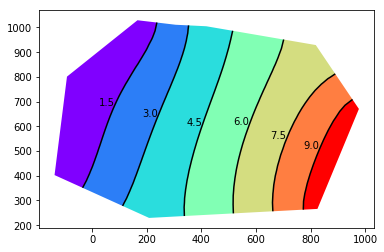

In [4]:
# get fringes polygons 
gdf_fringes = doc.c.plot.gdf.fringes("Head")

# plot alongside with isolines and labels
fig, ax = plt.subplots(1,1)
gdf_fringes.plot("Head_min", ax=ax, cmap="rainbow")
gdf_isolines.plot(ax=ax, colors="black")
_ = gdf_isolines.apply(lambda x: ax.annotate(s=x.Head, 
                                         xy=x.geometry.representative_point().coords[0], 
                                         ha='right', 
                                         color="black"),
                   axis=1)